In [5]:
# Import libraries
import numpy as np
import pandas as pd

In [6]:
# Read data from dataset into dataframe 
df = pd.read_csv('diabetes.csv')

In [7]:
# Display first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Data Reduction
# Remove/reduce unnecessary attributes from dataframe
subset = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'Outcome']]
subset.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


In [9]:
# Data Cleaning
# Find missing values
subset.isnull().sum()

Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [10]:
# Define function for median
def impute_median(series):
    return series.fillna(series.median())

In [11]:
subset.Price=df['Age'].transform(impute_median)
subset.Category=df['Outcome'].transform(impute_median)

C:\Users\shrey\AppData\Local\Temp\ipykernel_27624\2033394714.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  subset.Price=df['Age'].transform(impute_median)
C:\Users\shrey\AppData\Local\Temp\ipykernel_27624\2033394714.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  subset.Category=df['Outcome'].transform(impute_median)


In [12]:
# Fill missing value of integer column with mode
subset['Glucose'] = subset['Glucose'].fillna(subset['Glucose'].mode()[0])
subset['BloodPressure'] = subset['BloodPressure'].fillna(subset['BloodPressure'].mode()[0])
subset['Insulin'] = subset['Insulin'].fillna(subset['Insulin'].mode()[0])
subset['BMI'] = subset['BMI'].fillna(subset['BMI'].mode()[0])
subset['Age'] = subset['Age'].fillna(subset['Age'].mode()[0])
subset['Outcome'] = subset['Outcome'].fillna(subset['Outcome'].mode()[0])

C:\Users\shrey\AppData\Local\Temp\ipykernel_27624\3451108570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Glucose'] = subset['Glucose'].fillna(subset['Glucose'].mode()[0])
C:\Users\shrey\AppData\Local\Temp\ipykernel_27624\3451108570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['BloodPressure'] = subset['BloodPressure'].fillna(subset['BloodPressure'].mode()[0])
C:\Users\shrey\AppData\Local\Temp\ipykernel_27624\3451108570.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [13]:
subset.isnull().sum()

Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [14]:
# Data Reduction 
subset1 = df[['Glucose', 'BloodPressure', 'Insulin']]
subset1.head()

,Glucose,BloodPressure,Insulin
0,148,72,0
1,85,66,0
2,183,64,0
3,89,66,94
4,137,40,168


In [15]:
display(subset,subset1)

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1
...,...,...,...,...,...,...
763,101,76,180,32.9,63,0
764,122,70,0,36.8,27,0
765,121,72,112,26.2,30,0
766,126,60,0,30.1,47,1


,Glucose,BloodPressure,Insulin
0,148,72,0
1,85,66,0
2,183,64,0
3,89,66,94
4,137,40,168
...,...,...,...
763,101,76,180
764,122,70,0
765,121,72,112
766,126,60,0


In [16]:
# Data Integration
# Integrate/merge two dataframe
subset2 = pd.merge(subset,subset1,left_index=True, right_index=True)

In [17]:
subset2.head(20)

,Glucose_x,BloodPressure_x,Insulin_x,BMI,Age,Outcome,Glucose_y,BloodPressure_y,Insulin_y
0,148,72,0,33.6,50,1,148,72,0
1,85,66,0,26.6,31,0,85,66,0
2,183,64,0,23.3,32,1,183,64,0
3,89,66,94,28.1,21,0,89,66,94
4,137,40,168,43.1,33,1,137,40,168
5,116,74,0,25.6,30,0,116,74,0
6,78,50,88,31.0,26,1,78,50,88
7,115,0,0,35.3,29,0,115,0,0
8,197,70,543,30.5,53,1,197,70,543
9,125,96,0,0.0,54,1,125,96,0


In [18]:
# Data Transformation
from openpyxl import Workbook
subset2.to_excel('combine.xlsx')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

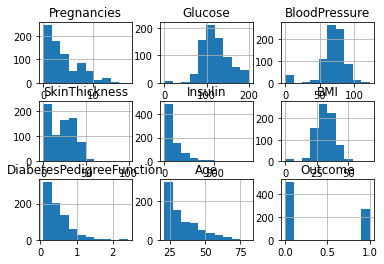

In [19]:
df.hist()

In [20]:
# Import train_test_split function
import sklearn.model_selection
from sklearn.model_selection import train_test_split

#Separate columns in dependent and independent variables

X = df.drop("Outcome", axis= 1)
Y = df[["Outcome"]]

In [21]:
# Split dataset into tranining and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=1)

In [22]:
# Import Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using traning sets
model.fit(X_train, Y_train)

# Predict the response for test datasets
Y_pred = model.predict(X_test)

C:\Users\shrey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn import metrics

In [24]:
print("accuracy:", metrics.accuracy_score (Y_test, Y_pred))

accuracy: 0.7835497835497836


In [25]:
test_pred = model.predict(X_test)

print(metrics.classification_report(Y_test, test_pred))
print(metrics.confusion_matrix(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

[[128  18]
 [ 32  53]]
